In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
paths = ['./dense_vs_sparse_GeForce GTX 1080 Ti.csv',
         './dense_vs_sparse_cpu.csv']
df_dvs_gpu = pd.read_csv(paths[0])
df_dvs_cpu = pd.read_csv(paths[1])

In [5]:
df_dvs_gpu

,Unnamed: 0,256,512,1024,2048,4096,8192
0,0,0.499475,0.128343,0.219305,0.142703,0.148925,0.151903
1,1,0.138684,0.142241,0.221549,0.145397,0.141763,0.147331
2,2,0.130846,0.138514,0.214016,0.146150,0.132940,0.144460
3,3,0.136706,0.137227,0.237876,0.151984,0.141053,0.141088
4,4,0.136477,0.140357,0.236753,0.151576,0.137573,0.136047


In [6]:
df_dvs_cpu

,Unnamed: 0,256,512,1024,2048,4096,8192
0,0,0.917271,0.198372,0.040990,0.019606,0.009407,0.004852
1,1,0.745906,0.124985,0.247395,0.150488,0.184913,0.051418
2,2,0.986860,1.333260,1.386224,1.103257,0.751804,0.330318
3,3,1.054522,1.011837,5.193045,3.404779,7.853228,3.002146
4,4,1.005201,18.137804,2.802701,5.401359,45.099933,18.499159


In [24]:
print(list(map(int , list(df_dvs_cpu.index))), df_dvs_cpu.columns)
print(df_dvs_cpu.iloc[:]['256'].values, df_dvs_cpu.columns)

[0, 1, 2, 3, 4] Index(['Unnamed: 0', '256', '512', '1024', '2048', '4096', '8192'], dtype='object')
[0.91727096 0.74590644 0.98686011 1.05452189 1.00520071] Index(['Unnamed: 0', '256', '512', '1024', '2048', '4096', '8192'], dtype='object')


In [80]:
def _plot_dvs_result(df, title = 'GPU', use_log10 = False):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}

    plt.rcParams.update({'font.size': 16})
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    row_names = list(map(int, list(df.index)))
    row_values = [-val for val in row_names]

    # col_names = list(df.columns)
    # col_names.remove('Unnamed: 0')
    col_names = ['256', '512', '2048', '4096']

    for name in col_names:
        yvals = df.iloc[:][name].values
        if use_log10:
            yvals = np.log10(yvals)
        axes.plot(row_values, yvals, label=name)
    
    axes.legend(title='Size(n) of nxn matrix')
    axes.set_title(title)
    axes.set_xlabel(r'$log_{10}$(Density)')
    ylabel = r'$t_{matmul}\ /\ t_{sparse\_mm}$'
    if use_log10:
        ylabel = r'$log_{10}(t_{matmul}\ /\ t_{sparse\_mm})$'
    axes.set_ylabel(ylabel)
    return fig, axes


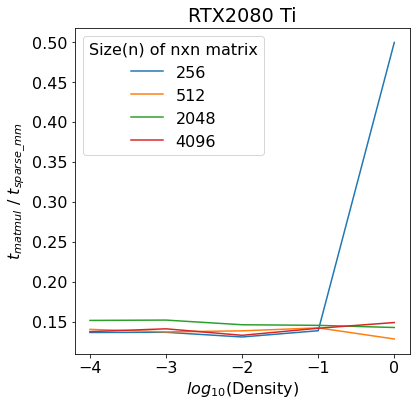

In [81]:
fig, axes = _plot_dvs_result(df_dvs_gpu, 'RTX2080 Ti')

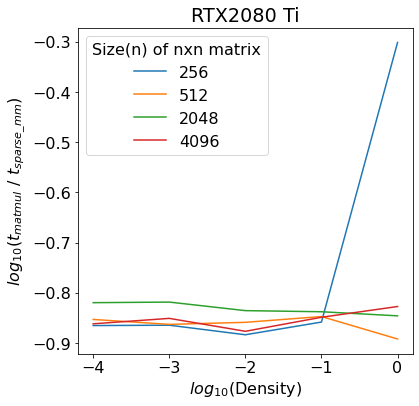

In [83]:
fig, axes = _plot_dvs_result(df_dvs_gpu, 'RTX2080 Ti', True)

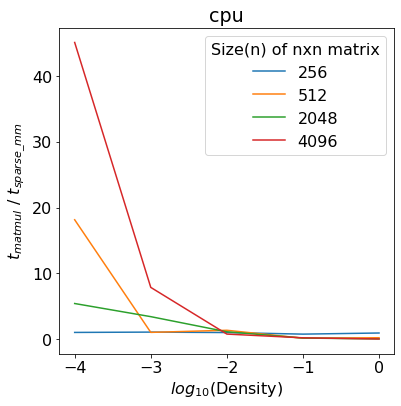

In [82]:
fig, axes = _plot_dvs_result(df_dvs_cpu, 'cpu')

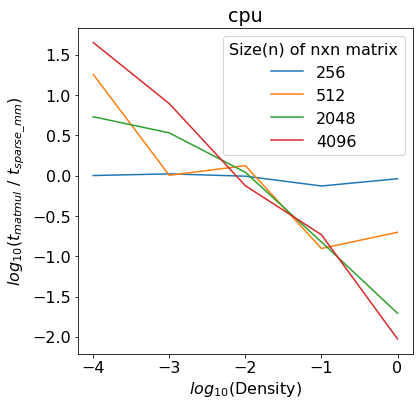

In [84]:
fig, axes = _plot_dvs_result(df_dvs_cpu, 'cpu', True)